# Projet 1 - Classification 

* **Authors:** Mouna Dhaouadi / Kacem Khaled
* **Class:** IFT6285
* **Term:** Fall 2021
* **Professor** Dr. Philippe Langlais

### Connecting to drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/IFT6285")
#/content/drive/My Drive/1-Polymtl/IFT6285
!ls

'=4.0.0'			    mrpc_manual_data.gsheet
'Copy of text-transformers.ipynb'  'Old - Projet1-Classification - task2.ipynb'
 Data				    Outputs
 dataframes.ipynb		    plots
'devoir1 (1).ipynb'		    Projet1-Classification-task1-CoLA.ipynb
 devoir1.ipynb			    Projet1-Classification-task2.ipynb
 Files				    TP2.ipynb
 Links.gdoc			    wandb
 Models


## Task 1 : COLA

### Step1 : Download and get to know the data 

In [ ]:
import pandas as pd
from statistics import mean

In [ ]:
COLA_data_folder = 'Data/CoLA/'
COLA_models_folder  = 'Models/CoLA/'
COLA_output_folder = 'Outputs/CoLA/'
COLA_plots_folder = 'plots/CoLA/'
COLA_files_folder = 'Files/CoLA/'


train_cola_file = COLA_data_folder +'train.tsv'
dev_cola_file =COLA_data_folder + 'dev.tsv'
test_cola_file =COLA_data_folder  + 'test.tsv'

#### Train set

In [ ]:
train_cola_data =  pd.read_table(train_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
train_cola_data

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8546,0,Poseidon appears to own a dragon
8547,0,Digitize is my happiest memory
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [ ]:
train_cola_data['Acceptability judgment label'].value_counts()

1    6023
0    2528
Name: Acceptability judgment label, dtype: int64

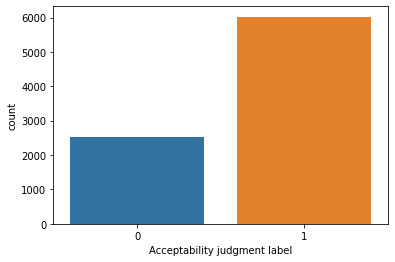

In [ ]:
from seaborn import countplot
countplot(x='Acceptability judgment label', data = train_cola_data )
# =['0=unacceptable', '1=acceptable']

In [ ]:
train_cola_data_wrong = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([0])]
train_cola_data_wrong

,Acceptability judgment label,Sentence
18,0,They drank the pub.
20,0,The professor talked us.
22,0,We yelled ourselves.
23,0,We yelled Harry hoarse.
25,0,Harry coughed himself.
...,...,...
8531,0,Anson believed to be happy.
8539,0,Anson left before Jenny saw himself.
8545,0,Anson thought that himself was going to the club.
8546,0,Poseidon appears to own a dragon


In [ ]:
train_cola_data_right = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([1])]
train_cola_data_right

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8543,1,Gilgamesh perhaps should be leaving.
8544,1,Gilgamesh hasn't kissed Ishtar.
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [ ]:
train_cola_sentences_list =  [sent for sent in train_cola_data["Sentence"]]
train_cola_sentences_list_lengthes =  [len ( sent.split() )  for sent in train_cola_data["Sentence"]]

train_cola_max_len =  max( train_cola_sentences_list_lengthes  ) 
train_cola_min_len =  min( train_cola_sentences_list_lengthes )
train_cola_avg_len = mean ( train_cola_sentences_list_lengthes  )

train_cola_max_len, train_cola_min_len, train_cola_avg_len

(42, 2, 7.696409776634312)

In [ ]:
train_cola_wrong_sentences_list =  [sent for sent in train_cola_data_wrong["Sentence"]]
train_cola_wrong_sentences_list_lengthes =  [ len ( sent.split()) for sent in train_cola_data_wrong["Sentence"]]


train_cola_wrong_max_len =  max( train_cola_wrong_sentences_list_lengthes ) 
train_cola_wrong_min_len = min( train_cola_wrong_sentences_list_lengthes )
train_cola_wrong_avg_len = mean ( train_cola_wrong_sentences_list_lengthes  )

train_cola_wrong_max_len, train_cola_wrong_min_len, train_cola_wrong_avg_len

(28, 2, 7.768987341772152)

In [ ]:
train_cola_right_sentences_list =  [sent for sent in train_cola_data_right["Sentence"]]
train_cola_right_sentences_list_lengthes =  [ len ( sent.split() ) for sent in train_cola_data_right["Sentence"]]

train_cola_right_max_len =  max( train_cola_right_sentences_list_lengthes ) 
train_cola_right_min_len =  min( train_cola_right_sentences_list_lengthes )
train_cola_right_avg_len = mean ( train_cola_right_sentences_list_lengthes  )
train_cola_right_max_len, train_cola_right_min_len, train_cola_right_avg_len

(42, 2, 7.665947202390835)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


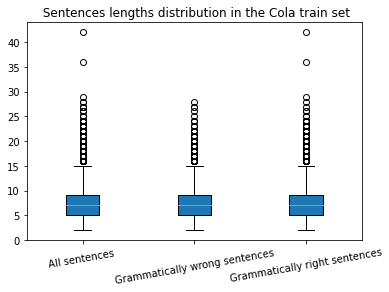

In [ ]:
import matplotlib.pyplot as plt

train_data_for_boxplots = [ train_cola_sentences_list_lengthes, train_cola_wrong_sentences_list_lengthes , train_cola_right_sentences_list_lengthes ]
fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.set_title(' Sentences lengths distribution in the Cola train set')
ax_boxplot.boxplot(train_data_for_boxplots, patch_artist = True)
plt.xticks([1, 2, 3], ["All sentences ", "Grammatically wrong sentences", "Grammatically right sentences"], rotation=10)
plt.show()

#### Dev set

In [ ]:
dev_cola_data =  pd.read_table(dev_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
dev_cola_data

,Acceptability judgment label,Sentence
0,1,The sailors rode the breeze clear of the rocks.
1,1,The weights made the rope stretch over the pul...
2,1,The mechanical doll wriggled itself loose.
3,1,"If you had eaten more, you would want less."
4,0,"As you eat the most, you want the least."
...,...,...
1038,1,John considers Bill silly.
1039,1,John considers Bill to be silly.
1040,0,John bought a dog for himself to play with.
1041,1,John arranged for himself to get the prize.


In [ ]:
dev_cola_data['Acceptability judgment label'].value_counts()

1    721
0    322
Name: Acceptability judgment label, dtype: int64

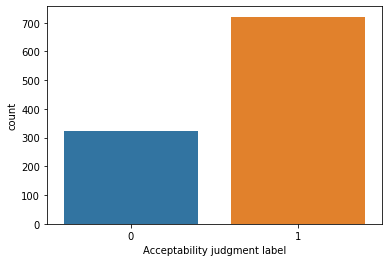

In [ ]:
from seaborn import countplot
countplot(x='Acceptability judgment label', data = dev_cola_data )
# =['0=unacceptable', '1=acceptable']

In [ ]:
dev_cola_data_wrong = dev_cola_data.loc[dev_cola_data['Acceptability judgment label'].isin([0])]
dev_cola_data_wrong

,Acceptability judgment label,Sentence
4,0,"As you eat the most, you want the least."
5,0,"The more you would want, the less you would eat."
6,0,"I demand that the more John eat, the more he p..."
13,0,"The more does Bill smoke, the more Susan hates..."
16,0,Who does John visit Sally because he likes?
...,...,...
1020,0,It is to give up to leave.
1022,0,It was believed to be illegal by them to do that.
1028,0,I gave Pete the book to impress.
1031,0,I presented Bill with it to read.


In [ ]:
dev_cola_data_right = dev_cola_data.loc[dev_cola_data['Acceptability judgment label'].isin([1])]
dev_cola_data_right

,Acceptability judgment label,Sentence
0,1,The sailors rode the breeze clear of the rocks.
1,1,The weights made the rope stretch over the pul...
2,1,The mechanical doll wriggled itself loose.
3,1,"If you had eaten more, you would want less."
7,1,"Mary listens to the Grateful Dead, she gets de..."
...,...,...
1037,1,The correspondence school sent Bill a good typ...
1038,1,John considers Bill silly.
1039,1,John considers Bill to be silly.
1041,1,John arranged for himself to get the prize.


In [ ]:
dev_cola_sentences_list =  [sent for sent in dev_cola_data["Sentence"]]
dev_cola_sentences_list_lengthes =  [len ( sent.split() )  for sent in dev_cola_data["Sentence"]]

dev_cola_max_len = max(dev_cola_sentences_list_lengthes)
dev_cola_min_len = min(dev_cola_sentences_list_lengthes) 
dev_cola_avg_len = mean ( dev_cola_sentences_list_lengthes  )
dev_cola_max_len, dev_cola_min_len, dev_cola_avg_len

(29, 2, 7.9213806327900285)

In [ ]:
dev_cola_wrong_sentences_list =  [sent for sent in dev_cola_data_wrong["Sentence"]]
dev_cola_wrong_sentences_list_lengthes =  [len ( sent.split() )  for sent in dev_cola_data_wrong["Sentence"]]

dev_cola_wrong_max_len = max(dev_cola_wrong_sentences_list_lengthes) 
dev_cola_wrong_min_len = min(dev_cola_wrong_sentences_list_lengthes)

dev_cola_wrong_avg_len = mean ( dev_cola_wrong_sentences_list_lengthes  )
dev_cola_wrong_max_len, dev_cola_wrong_min_len, dev_cola_wrong_avg_len

(27, 2, 7.850931677018633)

In [ ]:
dev_cola_right_sentences_list =  [sent for sent in dev_cola_data_right["Sentence"]]
dev_cola_right_sentences_list_lengthes =  [len ( sent.split() )  for sent in dev_cola_data_right["Sentence"]]

dev_cola_right_max_len = max( dev_cola_right_sentences_list_lengthes ) 
dev_cola_right_min_len = min( dev_cola_right_sentences_list_lengthes ) 
dev_cola_right_avg_len = mean ( dev_cola_right_sentences_list_lengthes  )
dev_cola_right_max_len, dev_cola_right_min_len, dev_cola_right_avg_len

(29, 2, 7.952843273231623)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


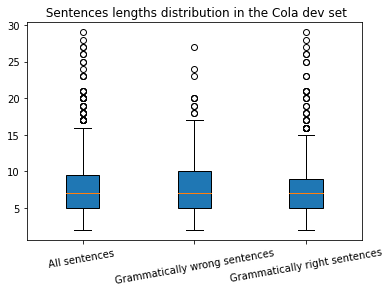

In [ ]:
import matplotlib.pyplot as plt

dev_data_for_boxplots = [ dev_cola_sentences_list_lengthes, dev_cola_wrong_sentences_list_lengthes, dev_cola_right_sentences_list_lengthes]
fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.set_title(' Sentences lengths distribution in the Cola dev set')
ax_boxplot.boxplot(dev_data_for_boxplots, patch_artist = True)
plt.xticks([1, 2, 3], ["All sentences ", "Grammatically wrong sentences", "Grammatically right sentences"], rotation=10)
plt.show()

#### Figures for report

In [ ]:
df_plot_train = train_cola_data
df_plot_train['set'] = 'Train Set'

df_plot_dev = dev_cola_data
df_plot_dev['set'] = 'Dev set'

df_plot = df_plot_train.append(df_plot_dev)
df_plot['set'].value_counts()

Train Set    8551
Dev set      1043
Name: set, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


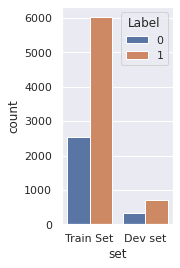

In [ ]:
from seaborn import countplot
import seaborn as sns

sns.set(rc={'figure.figsize':(2,4)})
df_plot2 = df_plot
df_plot2['Label']= df_plot['Acceptability judgment label']
ax = countplot(x='set', hue='Label', data = df_plot2 )
# =['0=unacceptable', '1=acceptable']
ax.figure.savefig(COLA_plots_folder+'cola_data_distribution.png', transparent=True, bbox_inches = 'tight') 
ax.figure.savefig(COLA_plots_folder+'cola_data_distribution.eps', transparent=True, bbox_inches = 'tight')

In [ ]:
l1 = [ len(sent.split()) for sent in train_cola_sentences_list ]
df1 = pd.DataFrame(l1 , columns=['sentence length'])
df1['selection'] = 'All sentences'
df1['set'] = 'Train set'


l2 = [ len(sent.split()) for sent in train_cola_wrong_sentences_list ]
df2 = pd.DataFrame(l2, columns=['sentence length'] )
df2['selection'] = 'Wrong sentences'
df2['set'] = 'Train set'

l3 = [ len(sent.split()) for sent in train_cola_right_sentences_list ]
df3 = pd.DataFrame(l3 , columns=['sentence length'] )
df3['selection'] = 'Right sentences'
df3['set'] = 'Train set'

l4 = [ len(sent.split()) for sent in dev_cola_sentences_list ]
df4 = pd.DataFrame(l4, columns=['sentence length'] )
df4['selection'] = 'All sentences'
df4['set'] = 'Dev set'

l5 = [ len(sent.split()) for sent in dev_cola_wrong_sentences_list ]
df5 = pd.DataFrame(l5 , columns=['sentence length'] )
df5['selection'] = 'Wrong sentences'
df5['set'] = 'Dev set'

l6 = [ len(sent.split()) for sent in dev_cola_right_sentences_list ]
df6 = pd.DataFrame(l6 , columns=['sentence length'] )
df6['selection'] = 'Right sentences'
df6['set'] = 'Dev set'

In [ ]:
df_all = None
df_all = df1.append(df2).append(df3).append(df4).append(df5).append(df6)
df_all

,sentence length,selection,set
0,13,All sentences,Train set
1,8,All sentences,Train set
2,8,All sentences,Train set
3,9,All sentences,Train set
4,8,All sentences,Train set
...,...,...,...
716,8,Right sentences,Dev set
717,4,Right sentences,Dev set
718,6,Right sentences,Dev set
719,8,Right sentences,Dev set


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


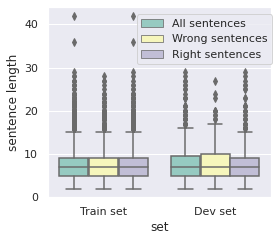

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(4,3.5)})
# df_plot2 = df_plot
# df_plot2['Label']= df_plot['Acceptability judgment label']


ax = sns.boxplot(hue='selection', y='sentence length', x='set',data=df_all, palette='Set3')
leg = ax.legend(loc=[0.4,0.7], frameon=True)

ax.figure.savefig(COLA_plots_folder+'cola_data_length_distribution.png', transparent=True, bbox_inches = 'tight')
ax.figure.savefig(COLA_plots_folder+'cola_data_length_distribution.eps', transparent=True, bbox_inches = 'tight')


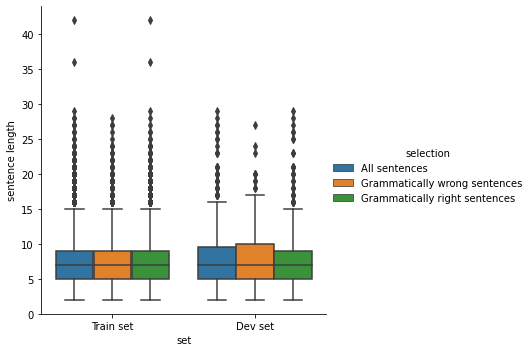

In [ ]:
g = sns.catplot(x="set", y="sentence length",
                hue="selection",
                data=df_all, kind="box",
                height=5, aspect=1);

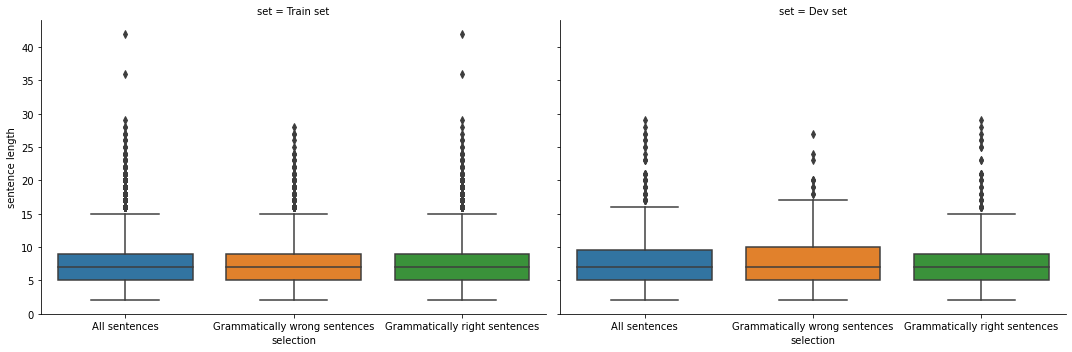

In [ ]:
g = sns.catplot(x="selection", y="sentence length",
                col="set",
                data=df_all, kind="box",
                height=5, aspect=1.5);

### Step 2 : Use a reasonable baseline and evaluate it 

In [ ]:
from sklearn.dummy import DummyClassifier
from joblib import dump, load
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score

#### Dummy Classifier to start with

In [ ]:
# Dummy classifier  train 
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(train_cola_data['Sentence'], train_cola_data['Acceptability judgment label'])

#save model 
dump(dummy_classifier, COLA_models_folder+'dummy-most.clf')

# load model 
clf_dummy = load(COLA_models_folder+'dummy-most.clf')

# predict with the model
y_dummy = clf_dummy.predict(dev_cola_data['Sentence']) # predictions

# output and save  the prediction
out = COLA_output_folder+"dummy_model.out"
pickle.dump([clf_dummy.classes_, y_dummy], open(out, 'wb'))

#open and read picle file to get predictions 
[ clf_dummy.classes_,y_dummy1 ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.69      1.00      0.82       721

    accuracy                           0.69      1043
   macro avg       0.35      0.50      0.41      1043
weighted avg       0.48      0.69      0.57      1043



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Reseanable baseline : Logistic Regression with TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression()
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# dump the vectorizer and the model (for use at test time)
dump(vectorizer, COLA_models_folder + 'tf-idf_vectorizer.vec')
dump(LogisticRegression_classifier, COLA_models_folder + 'LogisticRegression_classifier.clf') 

# load model + vec
vectorizer = load(COLA_models_folder + 'tf-idf_vectorizer.vec')
LogisticRegression_classifier = load(COLA_models_folder+'LogisticRegression_classifier.clf')

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifier

# output and save  the prediction
out = COLA_output_folder+"LogisticRegression_model.out"
pickle.dump([LogisticRegression_classifier.classes_, y_LR], open(out, 'wb'))

#open and read pickle file to get predictions 
[ LogisticRegression_classifier.classes_,y_LR ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], y_LR, pos_label=0))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10       322
           1       0.70      0.97      0.81       721

    accuracy                           0.69      1043
   macro avg       0.56      0.51      0.46      1043
weighted avg       0.61      0.69      0.59      1043

balanced accuracy score 0.5121660736899234
f1 score (class0) 0.10382513661202186


In [ ]:
baseline_vectorizer = vectorizer
baseline_classifier = LogisticRegression_classifier


baseline_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR)
baseline_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_LR, pos_label=0)

print(baseline_accuracy, baseline_f1_score)

0.5121660736899234 0.10382513661202186


#### Evaluation

In [ ]:
different scoring metrics :  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

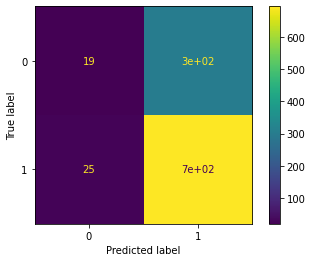

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dev_cola_data['Acceptability judgment label'], y_LR, labels=baseline_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=baseline_classifier.classes_)
disp.plot()


disp.figure_.savefig(COLA_plots_folder+'confusion_matrix_baseline.png', transparent=True)
disp.figure_.savefig(COLA_plots_folder+'confusion_matrix_baseline.eps', transparent=True)

In [ ]:
#smaller figure

figure = disp.figure_
figure.set_size_inches(2.5, 2.5)
figure.savefig(COLA_plots_folder+'confusion_matrix_baseline_smaller_cola.eps',transparent=True,bbox_inches='tight')

In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(dev_cola_data['Acceptability judgment label'], y_LR)
print('MCC:', mcc)

MCC: 0.0559199692822442


### Step3 : Trying to improve the baselines with various curious ways

#### Investigate the use of Grid search for LR classifier 

In [ ]:
## using the gridSearch - for LR classifier , not the vectorizer, on the Train Set !!! 

from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None

param_grid = dict(C=C_values, class_weight=class_weights , solver = solvers )
print(param_grid)

grid = GridSearchCV(baseline_classifier, param_grid, cv=10, scoring= 'balanced_accuracy' )
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
grid.fit(X_train, train_cola_data['Acceptability judgment label'])

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR_best = grid.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_best))


  #compare to the baseline
LR_best_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_best)
LR_best_score = f1_score(dev_cola_data['Acceptability judgment label'],y_LR_best, pos_label=0)

print(LR_best_accuracy, LR_best_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f} in accuracy compared to the baseline.'.format( 100 * (LR_best_accuracy - baseline_accuracy) ))
print('Improvement of {:0.2f} in f1_score compared to the baseline.'.format( 100 * (LR_best_score - baseline_f1_score) ))


{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
0.4892390717460893
{'C': 0.5, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       322
           1       0.69      0.99      0.81       721

    accuracy                           0.69      1043
   macro avg       0.51      0.50      0.42      1043
weighted avg       0.58      0.69      0.57      1043

0.5006633299161792 0.02395209580838323 0.5121660736899234 0.10382513661202186
Improvement of -1.15 in accuracy compared to the baseline.
Improvement of -7.99 in f1_score compared to the baseline.


In [ ]:
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score,  pos_label=0)

## using the gridSearch - for LR classifier , not the vectorizer, on the Train Set !!! 

from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None

param_grid = dict(C=C_values, class_weight=class_weights , solver = solvers )
print(param_grid)

grid = GridSearchCV(baseline_classifier, param_grid, cv=10, scoring = f1_scorer )
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
grid.fit(X_train, train_cola_data['Acceptability judgment label'])

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR_best = grid.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_best))


  #compare to the baseline
LR_best_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_best)
LR_best_score = f1_score(dev_cola_data['Acceptability judgment label'],y_LR_best, pos_label=0)

print(LR_best_accuracy, LR_best_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f} in accuracy compared to the baseline.'.format( 100 * (LR_best_accuracy - baseline_accuracy)))
print('Improvement of {:0.2f} in f1_score compared to the baseline.'.format( 100 * (LR_best_score - baseline_f1_score) ))


{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
0.24691429475600296
{'C': 0.5, 'class_weight': 'balanced', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.38      0.48      0.42       322
           1       0.74      0.66      0.70       721

    accuracy                           0.60      1043
   macro avg       0.56      0.57      0.56      1043
weighted avg       0.63      0.60      0.61      1043

0.5676747271301936 0.425 0.5121660736899234 0.10382513661202186
Improvement of 5.55 in accuracy compared to the baseline.
Improvement of 32.12 in f1_score compared to the baseline.


#### Impact of changing hyper-parmeters of the baseline (classifier + vectoriser)



In [ ]:
###### Without saving any models or outputs

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None

accuracy_scores = []
f1_scores = []

vect_parameters = []
clsf_parameters = []

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          print(max_df, min_df)
          if max_df < min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                  # a number of options can control a vectorizer, I reckon you investigate them
                  vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_df,
                                              max_df=max_df,
                                              ngram_range=ngram_range)
                  classifier = LogisticRegression(C=c,class_weight=class_weight, solver=solver)
                  
                  try:
                    X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
                    classifier.fit(X_train, train_cola_data['Acceptability judgment label'])
                    # predict with the model
                    X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
                    y_LR = classifier.predict(X_test) # run the classifier

                    vect_params={'analyzer':analyzer, 'ngram_range': ngram_range, 'min_df':min_df, 'max_df':max_df}
                    clsf_params={'solver':solver, 'C':c, 'class_weight':class_weight}

                    accuracy_scores.append( balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR)  )
                    f1_scores.append( f1_score(dev_cola_data['Acceptability judgment label'],y_LR, pos_label=0) )

                    vect_parameters.append(vect_params)
                    clsf_parameters.append(clsf_params)

                  except ValueError as err:
                    print(err)

                      


print(accuracy_scores)
print(f1_scores)
print(baseline_accuracy, baseline_f1_score)

d =  {'vectorizer parameters': vect_parameters, 'classifier parameters': clsf_parameters, 'balanced accuracy score': accuracy_scores, 'f1 score of class 0' : f1_scores}
df = pd.DataFrame(data=d)
df.sort_values('balanced accuracy score', ascending=False)


1.0 0.01
0.8 0.01
0.9 0.01
1.0 0.05
0.8 0.05
0.9 0.05
1.0 1.0
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 1.0
0.9 1.0
1.0 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.01
0.9 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.05
0.9 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 1.0
0.9 1.0
1.0 0.01
0.8 0.01
0.9 0.01
1.0 0.05
0.8 0.05
0.9 0.05
1.0 1.0
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 1.0
0.9 1.0
1.0 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.01
0.9 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 0.05
0.9 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8 1.0
0.9 1.0
1.0 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.01
0.9 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0 1.0
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df.
After pruning, no terms remain. Try a lower min_df or a higher max_df

,vectorizer parameters,classifier parameters,balanced accuracy score,f1 score of class 0
1098,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
498,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
480,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'newton-cg', 'C': 0.5, 'class_weigh...",0.555388,0.446978
1092,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.555388,0.446978
492,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.555388,0.446978
...,...,...,...,...
1397,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.495839,0.000000
1403,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'sag', 'C': 1.5, 'class_weight': None}",0.495839,0.000000
1409,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'saga', 'C': 1.5, 'class_weight': N...",0.495839,0.000000
1385,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'newton-cg', 'C': 1.5, 'class_weigh...",0.495839,0.000000


In [ ]:
df.sort_values('f1 score of class 0', ascending=False)

,vectorizer parameters,classifier parameters,balanced accuracy score,f1 score of class 0
864,"{'analyzer': 'char', 'ngram_range': (1, 2), 'm...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.5,0.471795
642,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.5,0.471795
636,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.5,0.471795
1244,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'liblinear', 'C': 1, 'class_weight'...",0.5,0.471795
638,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 1, 'class_weight': 'b...",0.5,0.471795
...,...,...,...,...
615,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1, 'class_weight'...",0.5,0.000000
617,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.5,0.000000
619,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': None}",0.5,0.000000
621,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 1, 'class_weight': None}",0.5,0.000000


In [ ]:
df.sort_values('f1 score of class 0', ascending=False).iloc[0]

vectorizer parameters      {'analyzer': 'char', 'ngram_range': (1, 2), 'm...
classifier parameters      {'solver': 'saga', 'C': 0.5, 'class_weight': '...
balanced accuracy score                                                  0.5
f1 score of class 0                                                 0.471795
Name: 864, dtype: object

In [ ]:
df.sort_values('f1 score of class 0', ascending=False)['classifier parameters'].iloc[0]

{'C': 0.5, 'class_weight': 'balanced', 'solver': 'saga'}

In [ ]:
df.sort_values('f1 score of class 0', ascending=False)['vectorizer parameters'].iloc[0]

{'analyzer': 'char', 'max_df': 1.0, 'min_df': 1.0, 'ngram_range': (1, 2)}

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression(solver='saga', C=0.5, class_weight='balanced')
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifie

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], y_LR, pos_label=0))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42       322
           1       0.74      0.66      0.70       721

    accuracy                           0.60      1043
   macro avg       0.56      0.57      0.56      1043
weighted avg       0.63      0.60      0.61      1043

balanced accuracy score 0.5676747271301936
f1 score (class0) 0.425


In [ ]:
vectorizer = TfidfVectorizer( analyzer =  'char_wb', max_df=  0.8, min_df= 0.01, ngram_range=(1, 1))
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression(solver='saga', C=0.5, class_weight='balanced')
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifie

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], y_LR, pos_label=0))

              precision    recall  f1-score   support

           0       0.35      0.61      0.45       322
           1       0.74      0.50      0.60       721

    accuracy                           0.53      1043
   macro avg       0.55      0.56      0.52      1043
weighted avg       0.62      0.53      0.55      1043

balanced accuracy score 0.5553880480009649
f1 score (class0) 0.44697833523375147


In [ ]:
vectorizer = TfidfVectorizer( analyzer =  'char', max_df=  1.0, min_df= 1.0, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression(solver='saga', C=0.5, class_weight='balanced')
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifie

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], y_LR, pos_label=0))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47       322
           1       0.00      0.00      0.00       721

    accuracy                           0.31      1043
   macro avg       0.15      0.50      0.24      1043
weighted avg       0.10      0.31      0.15      1043

balanced accuracy score 0.5
f1 score (class0) 0.4717948717948718


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def train_save_predict(vectorizer, classifer, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name):
    
    X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
    classifer.fit(X_train, train_cola_data['Acceptability judgment label'])

    # dump the vectorizer and the model (for use at test time)
    dump(vectorizer, COLA_models_folder + vectorizer_name )
    dump(classifier, COLA_models_folder + classifier_name) 

    # load model + vec
    tf_idf_vectorizer = load(COLA_models_folder + vectorizer_name)
    LR_classifier = load(COLA_models_folder+classifier_name)

    # predict with the model
    X_test = tf_idf_vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
    y_LR = LR_classifier.predict(X_test) # run the classifier

    # output and save  the prediction
    out = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
    pickle.dump([LR_classifier.classes_, y_LR], open(out, 'wb'))



###### Step 1 :  try different meta-parameters and save them in different files.


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          print(max_df, min_df)
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                  # a number of options can control a vectorizer, I reckon you investigate them
                  vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_df,
                                              max_df=max_df,
                                              ngram_range=ngram_range)
                  
                  vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                  vectorizer_name = 'tf-idf_vectorizer'+vec_meta_parameters_name+'.vec'

                  classifier = LogisticRegression(C=c,class_weight=class_weight, solver=solver)
                  clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)

                  classifier_name = 'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+'.clf'
                  print(classifier_name)
                  try:
                    train_save_predict(vectorizer, classifier, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name )
                  except ValueError as err:
                    print(err)


                    



In [ ]:
###### Step 2: get the output files saved and calculate the evaluation metrics of all of them


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


accuracy_scores = []
f1_scores = []

vect_parameters = []
clsf_parameters = []

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                   vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                   clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)
                   filename = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
                   if os.path.isfile(filename): #is file exists
                      #open and read picle file to get predictions 
                      [ _ , y_LR_t ] = pickle.load( open(filename, 'rb'))

                      #compare and evaluate the predictions
                      #print(filename)
                      #print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

                      vect_params={'analyzer':analyzer, 'ngram_range': ngram_range, 'min_df':min_df, 'max_df':max_df}
                      clsf_params={'solver':solver, 'C':c, 'class_weight':class_weight}

                      accuracy_scores.append( balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_t)  )
                      f1_scores.append( f1_score(dev_cola_data['Acceptability judgment label'],y_LR_t, pos_label=0) )

                      vect_parameters.append(vect_params)
                      clsf_parameters.append(clsf_params)


print(accuracy_scores)
print(f1_scores)
print(baseline_accuracy, baseline_f1_score)

d =  {'vectorizer parameters': vect_parameters, 'classifier parameters': clsf_parameters, 'balanced accuracy score': accuracy_scores, 'f1 score of class 0' : f1_scores}
df = pd.DataFrame(data=d)
df.sort_values('balanced accuracy score', ascending=False)

[0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448, 0.5097841162636435, 0.5001658324790448, 0.5113369112946994, 0.5001658324790448, 0.5106434300186938, 0.5001658324790448,

,vectorizer parameters,classifier parameters,balanced accuracy score,f1 score of class 0
1044,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.556941,0.448747
492,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.555388,0.446978
498,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
1038,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
1020,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'newton-cg', 'C': 0.5, 'class_weigh...",0.555388,0.446978
...,...,...,...,...
1301,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'lbfgs', 'C': 1.5, 'class_weight': ...",0.495839,0.000000
1295,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'newton-cg', 'C': 1.5, 'class_weigh...",0.495839,0.000000
1313,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'sag', 'C': 1.5, 'class_weight': None}",0.495839,0.000000
1307,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.495839,0.000000


In [ ]:
best_accuracy_score=df.sort_values('balanced accuracy score', ascending=False)['balanced accuracy score'].iloc[0]

print('Best Improvement = {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (best_accuracy_score - baseline_accuracy) ))


Best Improvement = 4.48 in balanced accuracy compared to the baseline.


In [ ]:
print('Corressponding Classifier parameters', )
df.sort_values('balanced accuracy score', ascending=False)['classifier parameters'].iloc[0]


Corressponding Classifier parameters


{'C': 0.5, 'class_weight': 'balanced', 'solver': 'saga'}

In [ ]:
print('Corressponding vectorizer parameters', )
df.sort_values('balanced accuracy score', ascending=False)['vectorizer parameters'].iloc[0]

Corressponding vectorizer parameters


{'analyzer': 'char_wb', 'max_df': 0.8, 'min_df': 0.01, 'ngram_range': (1, 1)}

In [ ]:
df.sort_values('f1 score of class 0', ascending=False)

,vectorizer parameters,classifier parameters,balanced accuracy score,f1 score of class 0
1044,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.556941,0.448747
498,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
1038,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.555388,0.446978
1032,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.555388,0.446978
506,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'saga', 'C': 1, 'class_weight': 'ba...",0.555388,0.446978
...,...,...,...,...
549,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 1, 'class_weight': None}",0.500000,0.000000
551,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 1.5, 'class_weight': ...",0.500000,0.000000
553,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.500000,0.000000
555,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1, 'class_weight'...",0.500000,0.000000


In [ ]:
best_f1_score=df.sort_values('f1 score of class 0', ascending=False)['f1 score of class 0'].iloc[0]

print('Best Improvement = {:0.2f} in f1 score of class 0 compared to the baseline.'.format( 100 * (best_f1_score - baseline_f1_score) ))

Best Improvement = 34.49 in f1 score of class 0 compared to the baseline.


In [ ]:
print('Corressponding classifier parameters', )
df.sort_values('f1 score of class 0', ascending=False)['classifier parameters'].iloc[0]

Corressponding classifier parameters


{'C': 0.5, 'class_weight': 'balanced', 'solver': 'saga'}

In [ ]:
print('Corressponding vectorizer parameters', )
df.sort_values('f1 score of class 0', ascending=False)['vectorizer parameters'].iloc[0]

Corressponding vectorizer parameters


{'analyzer': 'char_wb', 'max_df': 0.8, 'min_df': 0.01, 'ngram_range': (1, 1)}

#### Performace of other feature- models  : 

##### Random Forest + TF-IDF VECTORIZER 

In [ ]:
# https://www.kaggle.com/onadegibert/sentiment-analysis-with-tfidf-and-random-forest
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

tfidf_vect = TfidfVectorizer()

tfidf_vect_fit=tfidf_vect.fit(train_cola_data['Sentence'])
X_train=vectorize(train_cola_data['Sentence'],tfidf_vect_fit)

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, train_cola_data['Acceptability judgment label'])


X_test=vectorize(dev_cola_data['Sentence'],tfidf_vect_fit)


y_RF = clf_RF.predict(X_test) # run the classifier
print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF))


              precision    recall  f1-score   support

           0       0.44      0.17      0.25       322
           1       0.71      0.90      0.79       721

    accuracy                           0.68      1043
   macro avg       0.57      0.54      0.52      1043
weighted avg       0.63      0.68      0.63      1043



In [ ]:
#compare to the baseline
RF_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], y_RF)
RF_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_RF, pos_label=0)

print(baseline_accuracy, baseline_f1_score)
print(RF_accuracy,RF_f1_score )

print('Improvement of {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (RF_accuracy - baseline_accuracy) ))
print('Improvement of {:0.2f} in f1_score of class 0  compared to the baseline.'.format( 100 * (RF_f1_score - baseline_f1_score)))

0.5121660736899234 0.10382513661202186
0.5368600373876862 0.24608501118568232
Improvement of 2.47 in balanced accuracy compared to the baseline.
Improvement of 14.23 in f1_score of class 0  compared to the baseline.


##### SVM + TFI-IDF VECTORIZER

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
X_test =  vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer

model = LinearSVC()
model.fit(X_train, train_cola_data['Acceptability judgment label'])
predictions = model.predict(X_test)

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], predictions))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], predictions) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], predictions, pos_label=0))

#compare to the baseline
SVM_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], predictions)
SVM_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], predictions, pos_label=0)

print('Improvement of {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (SVM_accuracy - baseline_accuracy) ))
print('Improvement of {:0.2f} in f1_score of class 0  compared to the baseline.'.format( 100 * (SVM_f1_score - baseline_f1_score)))


              precision    recall  f1-score   support

           0       0.40      0.20      0.26       322
           1       0.71      0.86      0.78       721

    accuracy                           0.66      1043
   macro avg       0.55      0.53      0.52      1043
weighted avg       0.61      0.66      0.62      1043

balanced accuracy score 0.531417716939034
f1 score (class0) 0.2644628099173554
Improvement of 1.93 in balanced accuracy compared to the baseline.
Improvement of 16.06 in f1_score of class 0  compared to the baseline.


##### XGBOOST + TFIDF VECTORIZER

In [ ]:
# https://xgboost.readthedocs.io/en/latest/parameter.html 
# https://gist.github.com/alinaselega/a85a41b733c0eed1d5c607fad0cddc17 

import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
X_test =  vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer


clf = xgb.XGBClassifier()
clf.fit(X_train, train_cola_data['Acceptability judgment label'])
testPredictions = clf.predict(X_test)

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], testPredictions))

print('balanced accuracy score',balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], testPredictions) )
print('f1 score (class0)', f1_score(dev_cola_data['Acceptability judgment label'], testPredictions, pos_label=0))

#compare to the baseline
xgb_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], testPredictions)
xgb_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], testPredictions, pos_label=0)

print('Improvement of {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (xgb_accuracy - baseline_accuracy) ))
print('Improvement of {:0.2f} in f1_score of class 0  compared to the baseline.'.format( 100 * (xgb_f1_score - baseline_f1_score)))

              precision    recall  f1-score   support

           0       0.46      0.02      0.04       322
           1       0.69      0.99      0.82       721

    accuracy                           0.69      1043
   macro avg       0.58      0.50      0.43      1043
weighted avg       0.62      0.69      0.57      1043

balanced accuracy score 0.5044624012542965
f1 score (class0) 0.03582089552238806
Improvement of -0.77 in balanced accuracy compared to the baseline.
Improvement of -6.80 in f1_score of class 0  compared to the baseline.


#### Performance of deep-learning models using transfer learning: fine tunining LSTM ( PRE - Trained on WikiText103 ) 

In [ ]:
!pip install fastai --upgrade 

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
from fastai.text.all import *

files = get_files(COLA_data_folder, recurse=False, extensions='.tsv')
print(files)

dls = TextDataLoaders.from_df(train_cola_data, text_col='Sentence', label_col='Acceptability judgment label', valid_pct=0.1)  ## Random 10% as validation

dls.show_batch(max_n=3) # tokenized text

[Path('Data/CoLA/dev.tsv'), Path('Data/CoLA/train.tsv'), Path('Data/CoLA/test.tsv')]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj everybody who has ever , worked in any office which contained any xxunk which had ever been used to type any letters which had to be signed by any xxunk who ever worked in any department like mine will know what i xxunk .",1
1,"xxbos xxmaj handsome though everyone xxunk me to try to force xxmaj bill to make xxmaj xxunk agree that xxmaj dick is , xxmaj i 'm still going to xxmaj marry xxmaj herman .",1
2,xxbos a xxunk xxunk of potatoes with xxunk xxunk fell on the professor of linguistics with the terrible taste in xxmaj xxunk - shirts from the twelfth story .,1


In [ ]:
len(dls.train_ds), len(dls.valid_ds)

(7696, 855)

In [ ]:
# load a pretrained model

from fastai import * 
balanced_accuracy = BalancedAccuracy()
f1_class0 = F1Score(pos_label=0)

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5) # https://docs.fast.ai/text.models.awdlstm.html
learn.metrics=[balanced_accuracy, f1_class0]
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(2624, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(2624, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)


In [ ]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 
learn.show_results() # on the training 

('0', tensor(0), tensor([0.5021, 0.4979]))


('0', tensor(0), tensor([0.5029, 0.4971]))


('1', tensor(1), tensor([0.4979, 0.5021]))


('0', tensor(0), tensor([0.5017, 0.4983]))


('0', tensor(0), tensor([0.5062, 0.4938]))


,text,category,category_
0,"xxbos xxmaj xxunk plays the guitar and finds xxunk for all the old folk songs which are still sung in these hills , and xxmaj xxunk writes down all the old folk songs which are still sung in these hills .",1,0
1,"xxbos xxmaj we did n't keep a list of the xxunk , but the xxmaj president thanked every soldier who had fought in the xxmaj gulf xxmaj war .",1,0
2,"xxbos xxmaj it is n't because xxmaj sue said anything bad about me that xxmaj i 'm angry , although she did say some bad things about me .",0,0
3,xxbos xxmaj the xxunk who had known that the train was not on fire said that those who had thought so had xxunk themselves in the xxunk .,1,0
4,xxbos xxmaj the hardest that i think i remember him ever telling me that he had heard of it xxunk around here was last xxmaj january 12th .,1,0
5,xxbos xxmaj this girl in the red coat will eat her breakfast before tomorrow and put a picture of xxmaj bill on your desk before tomorrow .,1,0
6,xxbos xxmaj the book of poems with a red cover from xxmaj blackwell by xxmaj robert xxmaj burns takes a very long time to read .,1,1
7,"xxbos xxmaj my uncle did n't buy anything for xxmaj christmas , but my aunt did it for him and it was bright red .",0,0
8,xxbos xxmaj here 's a plate for you to make xxmaj bob try to begin to force his sister to leave the cookies on .,1,0


In [ ]:
# then fine-tune it
learn.fine_tune(10, 1e-2)   # 4 epochs
# the accuracy/f1 score  shown are on the validation set

epoch,train_loss,valid_loss,balanced_accuracy_score,f1_score,time
0,0.665874,0.626317,0.519378,0.192420,00:16


epoch,train_loss,valid_loss,balanced_accuracy_score,f1_score,time
0,0.595491,0.603879,0.518162,0.099644,00:19
1,0.578258,0.579062,0.555320,0.254545,00:19
2,0.569246,0.554201,0.580727,0.328612,00:19
3,0.519733,0.559549,0.555287,0.232258,00:19
4,0.456583,0.613283,0.621492,0.429668,00:19
5,0.382907,0.617492,0.636314,0.466667,00:20
6,0.310901,0.683025,0.626832,0.449761,00:19
7,0.267935,0.722127,0.645245,0.483568,00:20
8,0.237763,0.777809,0.636314,0.466667,00:19
9,0.209438,0.773038,0.636598,0.468085,00:20


In [ ]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 

learn.show_results() # on the training 

('1', tensor(1), tensor([0.0025, 0.9975]))


('1', tensor(1), tensor([2.0931e-04, 9.9979e-01]))


('1', tensor(1), tensor([0.0207, 0.9793]))


('1', tensor(1), tensor([0.1591, 0.8409]))


('0', tensor(0), tensor([0.5109, 0.4891]))


,text,category,category_
0,"xxbos xxmaj xxunk plays the guitar and finds xxunk for all the old folk songs which are still sung in these hills , and xxmaj xxunk writes down all the old folk songs which are still sung in these hills .",1,0
1,"xxbos xxmaj we did n't keep a list of the xxunk , but the xxmaj president thanked every soldier who had fought in the xxmaj gulf xxmaj war .",1,1
2,"xxbos xxmaj it is n't because xxmaj sue said anything bad about me that xxmaj i 'm angry , although she did say some bad things about me .",0,1
3,xxbos xxmaj the xxunk who had known that the train was not on fire said that those who had thought so had xxunk themselves in the xxunk .,1,1
4,xxbos xxmaj the hardest that i think i remember him ever telling me that he had heard of it xxunk around here was last xxmaj january 12th .,1,1
5,xxbos xxmaj this girl in the red coat will eat her breakfast before tomorrow and put a picture of xxmaj bill on your desk before tomorrow .,1,1
6,xxbos xxmaj the book of poems with a red cover from xxmaj blackwell by xxmaj robert xxmaj burns takes a very long time to read .,1,1
7,xxbos the book with a red cover from xxmaj blackwell of poems by xxmaj robert xxmaj burns takes a very long time to read .,0,0
8,"xxbos xxmaj my uncle did n't buy anything for xxmaj christmas , but my aunt did it for him and it was bright red .",0,1


In [ ]:
preds, y = learn.get_preds(dl = dls.valid)
preds, y,  len(preds), len(y)

(tensor([[2.0444e-03, 9.9796e-01],
         [9.2925e-02, 9.0708e-01],
         [6.3107e-02, 9.3689e-01],
         ...,
         [8.6003e-06, 9.9999e-01],
         [1.2750e-03, 9.9872e-01],
         [2.2325e-02, 9.7768e-01]]),
 TensorCategory([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
         0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
         1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
         1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
         1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 0, 1, 1, 1, 1, 1, 1, 1

In [ ]:
accuracy(preds, y) # on the validation set 

TensorBase(0.7368)

In [ ]:
#save the model
learn.export(COLA_models_folder + 'AWD_LSTM_model_10_epochs.pkl')

In [ ]:
# load the model 
LSTM_model = load_learner(COLA_models_folder + 'AWD_LSTM_model_10_epochs.pkl')

In [ ]:
LSTM_predictions = []

# predict on the test set:
for test_instance in dev_cola_data['Sentence'] :
    p = LSTM_model.predict(test_instance)
    LSTM_predictions.append(np.int64(p[0]))

print(len(LSTM_predictions))

1043


In [ ]:
#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], LSTM_predictions))

print('balanced accuracy score', balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions))
print('f1 score of class 0', f1_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions, pos_label = 0 ))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39       322
           1       0.74      0.89      0.81       721

    accuracy                           0.71      1043
   macro avg       0.65      0.60      0.60      1043
weighted avg       0.69      0.71      0.68      1043

balanced accuracy score 0.5979165410360008
average precision score 0.7360978750680883
f1 score of class 0 0.39191919191919194


In [ ]:
LSTM_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions)
LSTM_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions, pos_label = 0 )

print(LSTM_accuracy, LSTM_f1_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (LSTM_accuracy - baseline_accuracy)))
print('Improvement of {:0.2f} in f1_score of class 0 compared to the baseline.'.format( 100 * (LSTM_f1_score - baseline_f1_score) ))

0.5979165410360008 0.39191919191919194 0.5121660736899234 0.10382513661202186
Improvement of 8.58 in balanced accuracy compared to the baseline.
Improvement of 28.81 in f1_score of class 0 compared to the baseline.


#### Performance of deep learning models: BERT 

In [ ]:
# https://www.kaggle.com/hassanamin/bert-pytorch-cola-classification : BERT for Cola
# https://github.com/aniruddhachoudhury/BERT-Tutorials/blob/master/Blog%202/BERT_Fine_Tuning_Sentence_Classification.ipynb
# also the other notebook does transfer learning https://colab.research.google.com/drive/1uSnca5_i6IlzpRlZm_NB-XwOCzkQ-pB7#scrollTo=26649173

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 13.2 MB/s 
     |████████████████████████████████| 3.3 MB 43.3 MB/s 
     |████████████████████████████████| 895 kB 42.7 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
import numpy as np
import time
import datetime
import torch
import random
import seaborn as sns


##### Pytorch

In [ ]:
import torch

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


##### Finetune bert

In [ ]:
## this tutorial: https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=oCYZa1lQ8Jn8 
# https://mccormickml.com/2019/07/22/BERT-fine-tuning/#34-training--validation-split

tokenizer = BertTokenizer.from_pretrained('bert-large-cased',  do_lower_case=False ) 

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

In [ ]:
max_len = 0

sentences = train_cola_data['Sentence']

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  47


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

labels = train_cola_data['Acceptability judgment label']


# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,695 training samples
  856 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-large-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 393 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 1024)
bert.embeddings.position_embeddings.weight               (512, 1024)
bert.embeddings.token_type_embeddings.weight               (2, 1024)
bert.embeddings.LayerNorm.weight                             (1024,)
bert.embeddings.LayerNorm.bias                               (1024,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.query.bias               (1024,)
bert.encoder.layer.0.attention.self.key.weight          (1024, 1024)
bert.encoder.layer.0.attention.self.key.bias                 (1024,)
bert.encoder.layer.0.attention.self.value.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.value.bias               (1024,)
bert.encoder.layer.0.attention.output.dense.weight      (1024, 1024)
bert.encoder.layer.0.attention.output.dense.bias             (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:01:24.
  Batch    80  of    241.    Elapsed: 0:02:49.
  Batch   120  of    241.    Elapsed: 0:04:15.
  Batch   160  of    241.    Elapsed: 0:05:41.
  Batch   200  of    241.    Elapsed: 0:07:07.
  Batch   240  of    241.    Elapsed: 0:08:33.

  Average training loss: 0.47
  Training epcoh took: 0:08:34

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.38
  Validation took: 0:00:20

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:01:26.
  Batch    80  of    241.    Elapsed: 0:02:52.
  Batch   120  of    241.    Elapsed: 0:04:17.
  Batch   160  of    241.    Elapsed: 0:05:43.
  Batch   200  of    241.    Elapsed: 0:07:09.
  Batch   240  of    241.    Elapsed: 0:08:34.

  Average training loss: 0.27
  Training epcoh took: 0:08:36

Running Validation...
  Accuracy: 0.86
  Validation Loss: 0.36
  Validation took: 0:00:20

======== Epoch 3 / 4 ========
Training...
 

In [ ]:
 import torch
torch.cuda.empty_cache()

import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.47,0.38,0.85,0:08:34,0:00:20
2,0.27,0.36,0.86,0:08:36,0:00:20
3,0.15,0.44,0.87,0:08:33,0:00:19
4,0.10,0.54,0.87,0:08:31,0:00:20


##### Save and load the model

In [ ]:
print("Saving model to %s" % COLA_models_folder )

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(COLA_models_folder)
tokenizer.save_pretrained(COLA_models_folder)


Saving model to Models/CoLA/


('Models/CoLA/tokenizer_config.json',
 'Models/CoLA/special_tokens_map.json',
 'Models/CoLA/vocab.txt',
 'Models/CoLA/added_tokens.json')

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(COLA_models_folder)
tokenizer = BertTokenizer.from_pretrained(COLA_models_folder, do_lower_case=False)

# Copy the model to the GPU. <-------- GPU
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

##### Test bert

In [ ]:
######## dev Set

import pandas as pd


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(len(dev_cola_data)))

# Create sentence and label lists
sentences = dev_cola_data['Sentence']
labels = dev_cola_data['Acceptability judgment label']


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Number of test sentences: 1,043



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch) # <----------------GPU
  #batch = tuple(t for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,043 test sentences...
    DONE.


In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_predictions), len(flat_true_labels))

1043 1043


In [ ]:
#compare and evaluate the predictions
print(classification_report(flat_true_labels, flat_predictions))

print('balanced accuracy score:', balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], flat_predictions))
print('f1 score of class 0:', f1_score(dev_cola_data['Acceptability judgment label'], flat_predictions, pos_label = 0))
print('f1 score of class 1:', f1_score(dev_cola_data['Acceptability judgment label'], flat_predictions, pos_label = 1))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73       322
           1       0.85      0.95      0.90       721

    accuracy                           0.85      1043
   macro avg       0.85      0.79      0.81      1043
weighted avg       0.85      0.85      0.85      1043

balanced accuracy score: 0.7916390279201593
f1 score of class 0: 0.7262969588550984
f1 score of class 1: 0.899803536345776


In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(dev_cola_data['Acceptability judgment label'], flat_predictions)
print('MCC:', mcc) 

MCC: 0.6430274487762421


In [ ]:
#compare to the baseline

bert_accuracy = balanced_accuracy_score(dev_cola_data['Acceptability judgment label'], flat_predictions)
bert_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], flat_predictions, pos_label = 0 )

print(bert_accuracy, bert_f1_score)
print(baseline_accuracy, baseline_f1_score)

print('Improvement of {:0.2f} in balanced accuracy compared to the baseline.'.format( 100 * (bert_accuracy - baseline_accuracy) ))
print('Improvement of {:0.2f} in f1_score of class 0 compared to the baseline.'.format( 100 * (bert_f1_score - baseline_f1_score) ))

0.7916390279201593 0.7262969588550984
0.5121660736899234 0.10382513661202186
Improvement of 27.95 in balanced accuracy compared to the baseline.
Improvement of 62.25 in f1_score of class 0 compared to the baseline.


### Step4: Choosing the best system and its configuration 

In [ ]:
#### Looking at the sizes

In [ ]:
!ls -l --block-size=K $COLA_models_folder  

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
total 1303798K
-rw------- 1 root root       1K Nov  3 03:30 config.json
-rw------- 1 root root      43K Nov  3 02:51 LogisticRegression_classifier.clf
-rw------- 1 root root 1303210K Nov  3 03:31 pytorch_model.bin
-rw------- 1 root root       1K Nov  3 03:31 special_tokens_map.json
-rw------- 1 root root     334K Nov  3 02:51 tf-idf_vectorizer.vec
-rw------- 1 root root       1K Nov  3 03:31 tokenizer_config.json
-rw------- 1 root root     209K Nov  3 03:31 vocab.txt


In [ ]:
!ls -l --block-size=M $COLA_models_folder/pytorch_model.bin

-rw------- 1 root root 1273M Nov  3 03:31 Models/CoLA//pytorch_model.bin


### Step5: Neat Analysis of the chosen system ( including creating new data ) 

#### Creating new data

In [ ]:
# new sentences 

import pandas as pd
from pandas import Series

# test new data 
all_test_sentences = []
all_test_labels = []



############## Grammar Weaknesses

# Q 1 : Can the model differente between  pronouns, who, whom,  whose ? ---> NO
test1 =   ["Who are you?", "Whom are you?", "Whose are you?" , "The people who just left are rude", "The people whom just left are rude",  "The people whose just left are rude" ]
labels1 = [ 1            , 0              , 0                ,1                                  , 0                                   , 0 ]

all_test_sentences.extend(test1)
all_test_labels.extend(labels1)


# Q 2 : Does the model think that, if a sentence is long, it is correct ? ---> YES
test2 = ['I have a big sister who loves her ten black cats so much that she spends a lot of money monthly to provide expensive food and  milk for they.', 
         'I wanted to come to the party last weekend, but I did not go because I had a lot of important work that needed to be doing before monday.' , 
         'Two months ago, I watched a very good movies about the serious bad effects of social media, like Facebook, Instagram and Tick-Tock, on young adults and especially on teenagers.',
          'I do not remember the last time I went for a long walk with my sweet mother and my two beautiful sisters in the big garden of  lovely house.'
      ]

labels2 = [ 0,
           0 ,
          0,
           0]

all_test_sentences.extend(test2)
all_test_labels.extend(labels2)


# Q 3 : Does the model think that, if a sentence is short, it is incorrect ? ---> NO
test3 =   ['It hurts.', "It's raining." , "You suck." , "Run!" , "You us.", "Alex loves." , "I dog."]
labels3 = [ 1,         1                , 1           , 1       , 0       ,  0            ,   0 ]

all_test_sentences.extend(test3)
all_test_labels.extend(labels3)


# Q 4: Can the model differentiate between subject and object pronouns?  -------> NOt very well
# https://www.englishgrammar101.com/module-2/pronouns/lesson-3/challenging-uses-of-cases 

test4 = ['Jesse and me went to school.', 'Jesse and I went to school.', 'He bought a puppy.',	'Him bought a puppy.', 'She took the bus.',	'Her took the bus.' , 'We like shopping.', 'Us like shopping.']
labels4=[0 ,                             1                           , 1                             ,  0             , 1                 , 0                 ,   1                 , 0 ]

all_test_sentences.extend(test4)
all_test_labels.extend(labels4)


# Q 5: can the model differentiate comparative and superalative -------> NO
test5 = ['Alex is taller than me.', 'Alex is tallest than me.', 'Robin is the shortest.',	'Robin is the shorter.']
labels5=[1                        ,0                          , 1                       ,  0 ]

all_test_sentences.extend(test5)
all_test_labels.extend(labels5)


# Q 6: can the model detect when use plural/vs singular -------> YES
test6 = ['I have five cats.', 'I have five cat.', 'You ate several apples.',	'You ate several apple.', 'I have a car.', 'I have a cars.']
labels6=[1                 ,0                  , 1                       ,   0                        , 1              , 0 ]

all_test_sentences.extend(test6)
all_test_labels.extend(labels6)


# Q 7: can the model detect the nouns that do not have plurials -------> Not all of them
test7 = ['I have a lot of money.', 'I have a lot of moneys.', 'They have good education',	'They have good educations', 'Steven gave me some good advice.', 'Steven gave me some good advices.' ]
labels7=[1                       ,0                        , 1                         ,   0                        , 1                                 , 0 ]

all_test_sentences.extend(test7)
all_test_labels.extend(labels7)


# Q 8: can the model differentiate between your and you are ?  -------> YES
test8 = ['You are nice.', 'Your nice.', 'Your car is expensive.',	'You are car is expensive' ]
labels8=[1              ,0           , 1                  , 0 ]

all_test_sentences.extend(test8)
all_test_labels.extend(labels8)


############## Punctuation Weaknesses

# Q 9: Can the model understand when a question mark should be used  ? --->  NO 
test9 =   [ "Who are you?",  "Who are you." , "Where are you going?" , "Where are you going." , "What time is it?", "What time is it."]  
labels9 = [ 1             , 0               , 1                      , 0                       ,1                 , 0 ] 

all_test_sentences.extend(test9)
all_test_labels.extend(labels9)


# Q 10: Can the model understand when an exclamation mark should be used  ? --->   NO
test10=   [ "What a beautiful view!",  "What a beautiful view." , "What large hands you have!" , "What large hands you have."]  
labels10 = [ 1                       , 0                         , 1                            , 0                          ] 

all_test_sentences.extend(test10)
all_test_labels.extend(labels10)

############## 


test_sentences_for_bert = pd.Series(all_test_sentences)
test_labels_for_bert = pd.Series(all_test_labels)

#### Testing the new data

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification
import numpy as np
from sklearn.metrics import classification_report, balanced_accuracy_score, average_precision_score, f1_score
import torch


#load the model
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(COLA_models_folder)
tokenizer = BertTokenizer.from_pretrained(COLA_models_folder, do_lower_case=False)

# Copy the model to the GPU. <---------------GPU
model.to(device)


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test_sentences_for_bert:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels_for_bert)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on manually created test set

print('Predicting labels for {:,} the manually created test sentences for bert...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch) # <---------------GPU
  #batch = tuple(t for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_predictions), len(flat_true_labels))


d = { 'Test sentences manually created' : test_sentences_for_bert, 'True Labels' : flat_true_labels, 'Predicted Labels': flat_predictions }
df= pd.DataFrame( data = d)
df

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Predicting labels for 55 the manually created test sentences for bert...
    DONE.
55 55


,Test sentences manually created,True Labels,Predicted Labels
0,Who are you?,1,1
1,Whom are you?,0,1
2,Whose are you?,0,1
3,The people who just left are rude,1,1
4,The people whom just left are rude,0,1
5,The people whose just left are rude,0,1
6,I have a big sister who loves her ten black ca...,0,1
7,"I wanted to come to the party last weekend, bu...",0,1
8,"Two months ago, I watched a very good movies a...",0,1
9,I do not remember the last time I went for a l...,0,1


#### Evaluating the performance

In [ ]:
len(df)

55

In [ ]:
len( df[  ( df['True Labels'] == df['Predicted Labels'] )   ] )

37

In [ ]:
from sklearn.metrics import accuracy_score

print('accuracy score is (number of correctly classified samples)', accuracy_score(flat_true_labels, flat_predictions, normalize = False)) 

accuracy score is (number of correctly classified samples) 37


#### Putting the test sentences in a file with the same format as the file dev

In [ ]:
#putting the 55 sentences in a tsv file like the dev set 
code = 'test55'

test_file_name = COLA_files_folder + 'cola-kacem_khaled-mouna_dhaouadi.tsv'

with open(test_file_name,"w", encoding='utf-8') as f:
  for i in range(len(df)):
    row = df.iloc[i]  
    if int(row['True Labels']) == 1 : star = ''
    else: star = '*'
    phrase = code + '\t' + str(row['True Labels']) + '\t'  + star + '\t' + row['Test sentences manually created'] + '\n'
    f.write(phrase)

f.close()


In [ ]:
#making sure we can read it just like cola train files 

test_file_name = COLA_files_folder + 'cola-kacem_khaled-mouna_dhaouadi.tsv'
pd.read_table(test_file_name, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])

,Acceptability judgment label,Sentence
0,1,Who are you?
1,0,Whom are you?
2,0,Whose are you?
3,1,The people who just left are rude
4,0,The people whom just left are rude
5,0,The people whose just left are rude
6,0,I have a big sister who loves her ten black ca...
7,0,"I wanted to come to the party last weekend, bu..."
8,0,"Two months ago, I watched a very good movies a..."
9,0,I do not remember the last time I went for a l...


### Step6: Improving the chosen system (based on the analysis above)

#### Create More training Data

In [ ]:
#create more trainig data : who, whose, whom
new_sentences_q1 = [
                 'Who is this person?',  'Whom is this person?', 'Whose is this person?',

                 'Who are they?', 'Whom are they?', 'Whose are they?',
                 
                 'Who wrote that letter?', 'Whom wrote that letter?', 'Whose wrote that letter?',

                 'Who is the manager?', 'Whom is the manager?',  'Whose is the manager?',

                  'Who is going to prepare dinner?', 'Whom is going to prepare dinner?', 'Whose is going to prepare dinner?',

                  'Who are you going to ask to the party?','Whom are you going to ask to the party?', 'Whose are you going to ask to the party?',

                  'Whom did they choose as team captain?','Who did they choose as team captain?', 'Whose did they choose as team captain?',

                  'Whom did they summon?', 'Who did they summon?', 'Whose did they summon?',

                  'Whose phone is this?', 'Who phone is this?', 'Whom phone is this?',

                  'Whose is this umbrella?', 'Who is this umbrella?',  'Whom is this umbrella?',

                  'Whose car is blocking the drive?', 'Who car is blocking the drive?', 'Whom car is blocking the drive?'
]

new_labels_q1 = [ 
              1,  0,  0,

              1, 0, 0,

              1, 0,0,

              1,  0, 0,

              1, 0, 0,

              0,  1, 0,

              1, 0, 0,

              1, 0, 0,

              1,0, 0,

              1, 0, 0,

              1,0,0
       
]

len(new_sentences_q1), len(new_labels_q1)

(33, 33)

In [ ]:
#phrases from the train set that have length > 28 --> make them incorrect
for i in range(8550):
  if len ( train_cola_data['Sentence'][i].split() ) > 28:
    print(train_cola_data['Sentence'][i])  

Playing with matches is; lots of fun, but doing, so and emptying gasoline from one can to another at the same time is a sport best reserved for arsons.
Hank plays the guitar and finds arrangements for all the old folk songs which are still sung in these hills, and Ernie writes down all the old folk songs which are still sung in these hills.
Everybody who has ever, worked in any office which contained any typewriter which had ever been used to type any letters which had to be signed by any administrator who ever worked in any department like mine will know what I mean.


In [ ]:
#create more trainig data : long incorrect phrases > 28 words ( I made the 3 sentences >28 words in the train set incorrect )
new_sentences_q2 = [
                'Playing with matches are; lots of fun, but doing, so and emptying gasoline from one can to another at the same time is a sport best reserved for arsons.',
                'Hank plays the guitar and finds arrangements for all the old folk songs which are still sung in these hills, and Ernie writes down all the old folk songs which is still sung in these hills.',
                'Everybody who has ever, worked in any office which contained any typewriter which had ever been used to type any letters which had to be signed by any administrators who ever worked in any department like mine will know what I mean.'
               
]

new_labels_q2 = [ 
                0,
                 0,
                 0
       
]

len(new_sentences_q2), len(new_labels_q2)

(3, 3)

In [ ]:
#create more trainig data : objective/subjective pronouns, examples with 'I' and 'me
new_sentences_q4 = [
                'He likes football.',
                'Him likes football.',

                'She goes to university.',
                'Her goes to university.',

                'They enjoy travelling.',
                'Them enjoy travelling.',

                'The employees respect me.',
                'The employees respect I.',

                'I know her.',
                'Me know her.',

                'The sailors waved to me.',
                'The sailors waved to I.', 

                'My family and I are going to meet John today.',
                'My family and me are going to meet John today.',

                'My cousins and I ran into Kate at the mall yesterday.',
                'My cousins and me ran into Kate at the mall yesterday.',

                'Kate waited for me and my cousins at the mall yesterday.',
                'Kate waited for I and my cousins at the mall yesterday.',

]

new_labels_q4 = [ 
                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                1,
                0,
                 
                1,
                0,
                 
                 1,
                 0,

                 1,
                 0
                            
]

len(new_sentences_q4), len(new_labels_q4)

(18, 18)

In [ ]:
#create more trainig data : superlative/comparative 
new_sentences_q5 = [
                'My house is larger than hers.',
                'My house is largest than hers.',

                'This box is smaller than the one I lost.',
                'This box is smallest than the one I lost.',

                'Your dog runs faster than my dog.',
                'Your dog runs fastest than my dog.',

                  'The rock flew higher than the roof. ',
                  'The rock flew highest than the roof. ',
                
                'Jim and Jack are both my friends, but I like Jack better. ',
                'Jim and Jack are both my friends, but I like Jack better than Jim. ',

                'My house is the largest one in our neighborhood.',
                'My house is the larger one in our neighborhood.',

                'This is the smallest box I have ever seen.',
                'This is the smaller box I have ever seen.',

               'Your dog ran the fastest of any dog in the race.',
               'Your dog ran the faster of any dog in the race.',

                'We all threw our rocks at the same time. My rock flew the highest.',
                'We all threw our rocks at the same time. My rock flew the highest of all the rocks.'

]

new_labels_q5 = [ 1,
                 0,

                1,
                 0,

                 1,
                 0,

                 1,
                 0,

                  1,
                 1,

                1,
                 0,

                1,
                 0,

                1,
                 0,

                1,
                 1     
]
len(new_sentences_q5), len(new_labels_q5)

(18, 18)

In [ ]:
#words without plurials, especially education + advice 
new_sentences_q7 = [
                'You have done this before, please give me your advice.', 
                'I need your advice on which car to buy.',
                'Her father gave them sound financial advice.',
                'She took my interview advice on board and got the job.',
                'Always get home improvement advice from an expert.',

                'You have done this before, please give me your advices.', 
                'I need your advices on which car to buy.',
                'Her father gave them sound financial advices.',
                'She took my interview advices on board and got the job.',
                'Always get home improvement advices from an expert.',

                'Our young people need education and more organized activities.',
                'You have the education, the experience in business and the personality.',
                'This is all that his foreign education has done for him!',

                'Our young people need educations and more organized activities.',
                'You have the educations, the experience in business and the personality.',
                'This is all that his foreign educations has done for him!',

]

new_labels_q7 = [ 
          1,
          1,
          1,
          1,
          1, 

          0,
          0,
          0,
          0,
          0,

          1,
          1,
          1,

          0,
          0,
          0
      
]

len(new_sentences_q7), len(new_labels_q7)

(16, 16)

In [ ]:
#interrogation mark
new_sentences_q9 = [
                'What did you witness?',
                'What was the date, time and duration of the incident or behavior you witnessed?',
                'Where did it happen?',
                'Who was involved?',
                'What did each person do and say?',
                'Did anyone else see it happen?',
                'What did you do after witnessing the incident or behavior?',

                'What did you witness.',
                'What was the date, time and duration of the incident or behavior you witnessed.',
                'Where did it happen.',
                'Who was involved.',
                'What did each person do and say.',
                'Did anyone else see it happen.',
                'What did you do after witnessing the incident or behavior.',

                'Where was Jimmy standing?',
                'What did Jimmy do as you were going back there?',
                'what was Jimmy doing all this while?',

                'Where was Jimmy standing.',
                'What did Jimmy do as you were going back there.',
                'what was Jimmy doing all this while.'
]

new_labels_q9 = [ 
                 1,
                 1,
                 1,
                 1,
                 1,
                 1,
                 1,

                0,
                 0,
                 0,
                 0,
                 0,
                 0,
                 0,

                 1,
                 1,
                 1,

                 0,
                 0,
                 0
   
]    

len(new_sentences_q9), len(new_labels_q9)        

(20, 20)

In [ ]:
#exclamation mark (phrses with what ! )
new_sentences_q10 = [
                      'What a bad influence!',
                     'What a nice surprise!',
                     'What a good idea!', 
                     'What a horrible movie!',
                     'What a delicious meal!',
                      'What a big pool!',

                        'What a bad influence.',
                     'What a nice surprise.',
                     'What a good idea.', 
                     'What a horrible movie.',
                     'What a delicious meal.',
                      'What a big pool.'
                
]

new_labels_q10 = [ 1,
                    1,
                    1,
                  1,
                  1,
                  1,

                  0,
                  0,
                  0,
                  0,
                  0,
                  0 
] 

len(new_sentences_q10), len(new_labels_q10)

(12, 12)

In [ ]:
#put all new data together 

new_sentences_all = []
new_labels_all = []

new_sentences_all.extend(new_sentences_q1 )
new_labels_all.extend(new_labels_q1)
                 
new_sentences_all.extend(new_sentences_q2 )
new_labels_all.extend(new_labels_q2)

new_sentences_all.extend(new_sentences_q4 )
new_labels_all.extend(new_labels_q4)
               
new_sentences_all.extend(new_sentences_q5 )
new_labels_all.extend(new_labels_q5)
               
new_sentences_all.extend(new_sentences_q7 )
new_labels_all.extend(new_labels_q7)

new_sentences_all.extend(new_sentences_q9 )
new_labels_all.extend(new_labels_q9)

new_sentences_all.extend(new_sentences_q10 )
new_labels_all.extend(new_labels_q10)


new_sentences_for_bert = pd.Series(new_sentences_all)
new_labels_for_bert = pd.Series(new_labels_all) 

new_data = {'new sentence' : new_sentences_for_bert, 'true label' : new_labels_for_bert }
df_new = pd.DataFrame(data = new_data )
df_new

,new sentence,true label
0,Who is this person?,1
1,Whom is this person?,0
2,Whose is this person?,0
3,Who are they?,1
4,Whom are they?,0
...,...,...
115,What a nice surprise.,0
116,What a good idea.,0
117,What a horrible movie.,0
118,What a delicious meal.,0


#### Putting the new training sentences in a file with the same format as train.tsv

In [ ]:
#putting the new training sentences in a tsv file like the train set 
code = 'newtrain120'

new_train_file_name = COLA_files_folder + 'cola-new-training-data-kacem_khaled-mouna_dhaouadi.tsv'

with open(new_train_file_name,"w", encoding='utf-8') as f:
  for i in range(len(df_new)):
    row = df_new.iloc[i]  
    if int(row['true label']) == 1 : star = ''
    else: star = '*'
    phrase = code + '\t' + str(row['true label']) + '\t'  + star + '\t' + row['new sentence'] + '\n'
    f.write(phrase)

f.close()


In [ ]:
#making sure we can read it just like cola train files 

new_train_file_name = COLA_files_folder + 'cola-new-training-data-kacem_khaled-mouna_dhaouadi.tsv'
new_train_cola_data = pd.read_table(new_train_file_name, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
new_train_cola_data

,Acceptability judgment label,Sentence
0,1,Who is this person?
1,0,Whom is this person?
2,0,Whose is this person?
3,1,Who are they?
4,0,Whom are they?
...,...,...
115,0,What a nice surprise.
116,0,What a good idea.
117,0,What a horrible movie.
118,0,What a delicious meal.


#### Re fine tune the system 

In [ ]:
#put all training data together 
train_cola_data_all = train_cola_data.append(new_train_cola_data, ignore_index=True )
train_cola_data_all

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8666,0,What a nice surprise.
8667,0,What a good idea.
8668,0,What a horrible movie.
8669,0,What a delicious meal.


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-cased',  do_lower_case=False ) 

max_len = 0

new_train_sentences = train_cola_data_all['Sentence']

# For every sentence...
for sent in new_train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

new_train_labels = train_cola_data_all['Acceptability judgment label']


# For every sentence...
for sent in new_train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(new_train_labels)

from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-large-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()


# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)




In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    244.    Elapsed: 0:01:25.
  Batch    80  of    244.    Elapsed: 0:02:51.
  Batch   120  of    244.    Elapsed: 0:04:17.
  Batch   160  of    244.    Elapsed: 0:05:42.
  Batch   200  of    244.    Elapsed: 0:07:08.
  Batch   240  of    244.    Elapsed: 0:08:34.

  Average training loss: 0.45
  Training epcoh took: 0:08:42

Running Validation...
  Accuracy: 0.84
  Validation Loss: 0.39
  Validation took: 0:00:20

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    244.    Elapsed: 0:01:26.
  Batch    80  of    244.    Elapsed: 0:02:51.
  Batch   120  of    244.    Elapsed: 0:04:17.
  Batch   160  of    244.    Elapsed: 0:05:42.
  Batch   200  of    244.    Elapsed: 0:07:08.
  Batch   240  of    244.    Elapsed: 0:08:34.

  Average training loss: 0.25
  Training epcoh took: 0:08:42

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.57
  Validation took: 0:00:20

======== Epoch 3 / 4 ========
Training...
 

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.45,0.39,0.84,0:08:42,0:00:20
2,0.25,0.57,0.82,0:08:42,0:00:20
3,0.14,0.56,0.84,0:08:41,0:00:20
4,0.09,0.66,0.85,0:08:41,0:00:20


#### Save and load the new trained system

In [ ]:
print("Saving new model to %s" % COLA_models_folder )

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(COLA_models_folder + 'new trained model/')
tokenizer.save_pretrained(COLA_models_folder + 'new trained model/')


Saving new model to Models/CoLA/


('Models/CoLA/new trained model/tokenizer_config.json',
 'Models/CoLA/new trained model/special_tokens_map.json',
 'Models/CoLA/new trained model/vocab.txt',
 'Models/CoLA/new trained model/added_tokens.json')

In [ ]:
Cola_new_trained_model_folder = COLA_models_folder  + 'new\ trained\ model/'
!ls -l --block-size=K $Cola_new_trained_model_folder  

total 1303421K
-rw------- 1 root root       1K Nov  5 23:10 config.json
-rw------- 1 root root 1303210K Nov  5 23:10 pytorch_model.bin
-rw------- 1 root root       1K Nov  5 23:11 special_tokens_map.json
-rw------- 1 root root       1K Nov  5 23:11 tokenizer_config.json
-rw------- 1 root root     209K Nov  5 23:11 vocab.txt


In [ ]:
!ls -l --block-size=M $Cola_new_trained_model_folder/pytorch_model.bin

-rw------- 1 root root 1273M Nov  5 23:10 'Models/CoLA/new trained model//pytorch_model.bin'


In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
new_model = BertForSequenceClassification.from_pretrained(COLA_models_folder + 'new trained model/')
new_tokenizer = BertTokenizer.from_pretrained(COLA_models_folder + 'new trained model/', do_lower_case=False)

# Copy the model to the GPU.
new_model.to(device)

#### Test on our 55 sentences 

In [ ]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification
import numpy as np
from sklearn.metrics import classification_report, balanced_accuracy_score, average_precision_score, f1_score
import torch



# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test_sentences_for_bert:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = new_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels_for_bert)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on manually created test set

print('Predicting labels for {:,} the manually created test sentences for bert...'.format(len(input_ids)))

# Put model in evaluation mode
new_model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch) # <---------------GPU
  #batch = tuple(t for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = new_model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_predictions), len(flat_true_labels))


d = { 'Test sentences manually created' : test_sentences_for_bert, 'True Labels' : flat_true_labels, 'Predicted Labels': flat_predictions }
df= pd.DataFrame( data = d)
df

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Predicting labels for 55 the manually created test sentences for bert...
    DONE.
55 55


,Test sentences manually created,True Labels,Predicted Labels
0,Who are you?,1,1
1,Whom are you?,0,0
2,Whose are you?,0,0
3,The people who just left are rude,1,1
4,The people whom just left are rude,0,1
5,The people whose just left are rude,0,1
6,I have a big sister who loves her ten black ca...,0,1
7,"I wanted to come to the party last weekend, bu...",0,1
8,"Two months ago, I watched a very good movies a...",0,1
9,I do not remember the last time I went for a l...,0,1


In [ ]:
len( df[  ( df['True Labels'] == df['Predicted Labels'] )   ] )

44

In [ ]:
from sklearn.metrics import accuracy_score

print('accuracy score is (number of correctly classified samples)', accuracy_score(flat_true_labels, flat_predictions, normalize = False)) 

accuracy score is (number of correctly classified samples) 44


### Step7 : Testing the system on new test data (later)

# The end.